## 06.24

- refactorizar codigo 
    - mover codigo a sus modulos

## 05.29

- definir API para realizar un experimento
    En un experimento se puede configurar
    - el grafo del sistema
    - la funcion de como actualizan los agentes su precio
    - el numero de pasos de la simulacion
    - las metricas para evaluar sobre el grafo en cada paso

#### To Do

- [ ] Integrar la funcion de update
- [ ] Definir como integrar sobre que nodos iterar en cada step
- [ ] Definir metodo para guardar los resultados del experimento

In [1]:
# mantener los imports siempre arriba
import init #para importar los modulos

import numpy as np
import pandas as pd

from experimento import Experimento
from grafo import armar_grafo, plot_grafo
from modelo import calcular_inflacion, dinamica_1, dinamica_2, dinamica_3

In [2]:
sectores = ['luz','chapa','campo','chip','comida']

pesos = np.array([[0,0.25,0.1,0,0],[0,0,0,0.7,0.15],[0,0,0,0,0.8],[0,0,0,0,0],[0,0,0,0,0]])
test = pd.DataFrame(data=pesos,columns=sectores,index=sectores)

pesos_ciclo = np.array([[0,0.25,0.1,0,0],[0,0,0,0.7,0.15],[0,0,0,0,0.8],[0.2,0,0,0,0],[0,0,0,0,0]])
test_ciclo = pd.DataFrame(data=pesos_ciclo,columns=sectores,index=sectores)
g_test = armar_grafo(test, precios_random=False)
g_test_ciclo = armar_grafo(test_ciclo, precios_random=False)

In [3]:
exp1 = Experimento(g_test,dinamica_1, calcular_inflacion=calcular_inflacion)

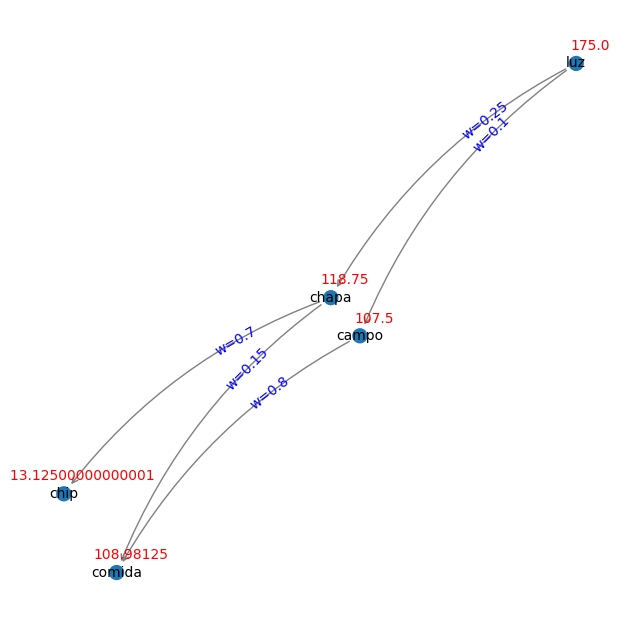

In [4]:
exp1.shock('luz',75)
exp1.step(20)
plot_grafo(exp1.grafo)


In [5]:
exp_alpha_1 = Experimento(g_test,dinamica_1, calcular_inflacion=calcular_inflacion, alpha = 0)
exp_alpha_2 = Experimento(g_test,dinamica_3, calcular_inflacion=calcular_inflacion, alpha = 0)

Con el alpha en 0, la dinámica 3 es igual a la 1. Lo vemos:

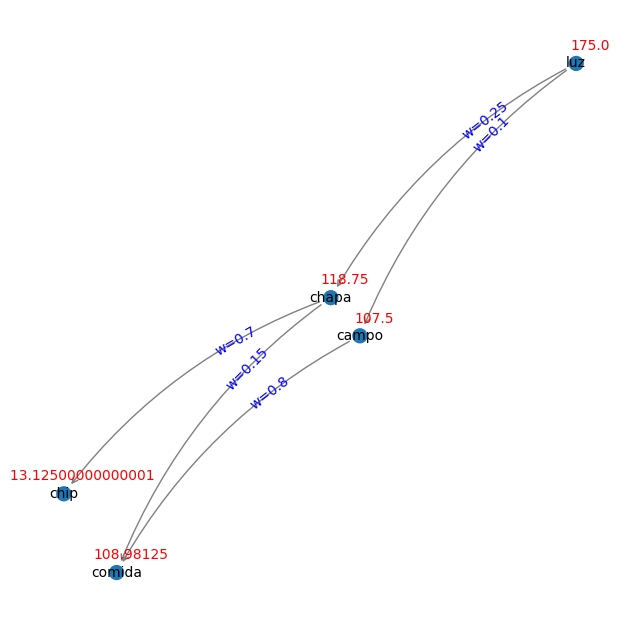

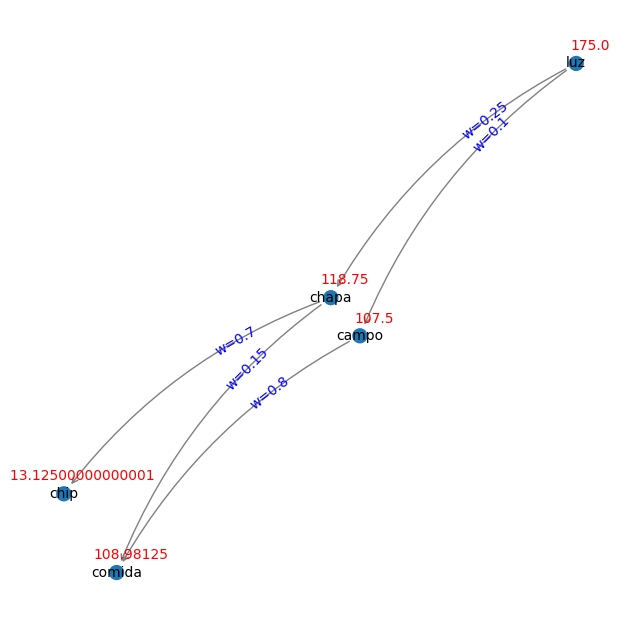

In [6]:
exp_alpha_1.shock('luz',75)
exp_alpha_2.shock('luz',75)
exp_alpha_1.step(20)
exp_alpha_2.step(20)
plot_grafo(exp_alpha_1.grafo)
plot_grafo(exp_alpha_2.grafo)

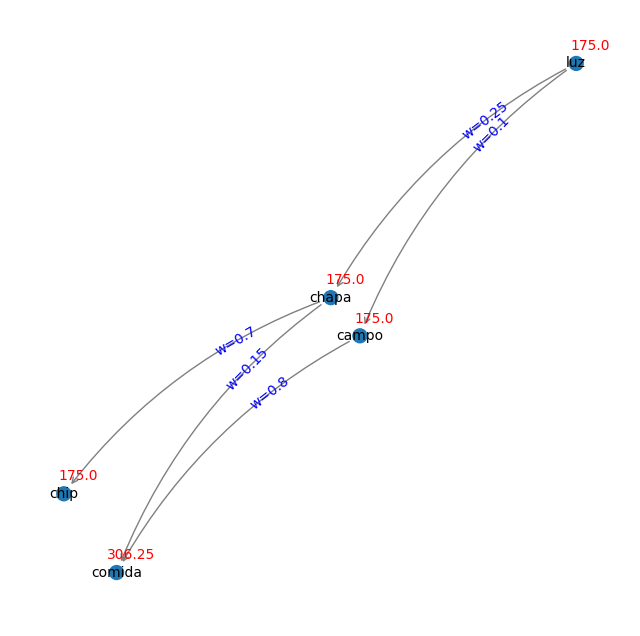

In [7]:
exp1_2 = Experimento(g_test,dinamica_2)
exp1_2.shock('luz',75)
exp1_2.step(20)
plot_grafo(exp1_2.grafo)

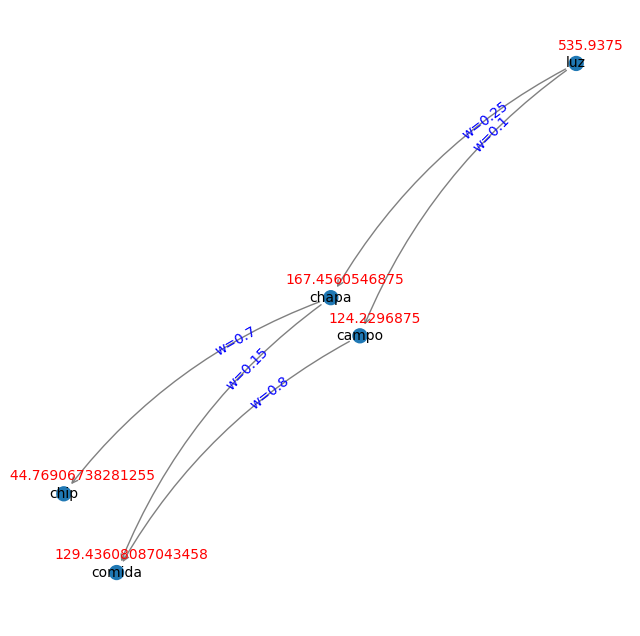

In [9]:
exp1.shock('luz',75)
exp1.step(50)
plot_grafo(exp1.grafo)

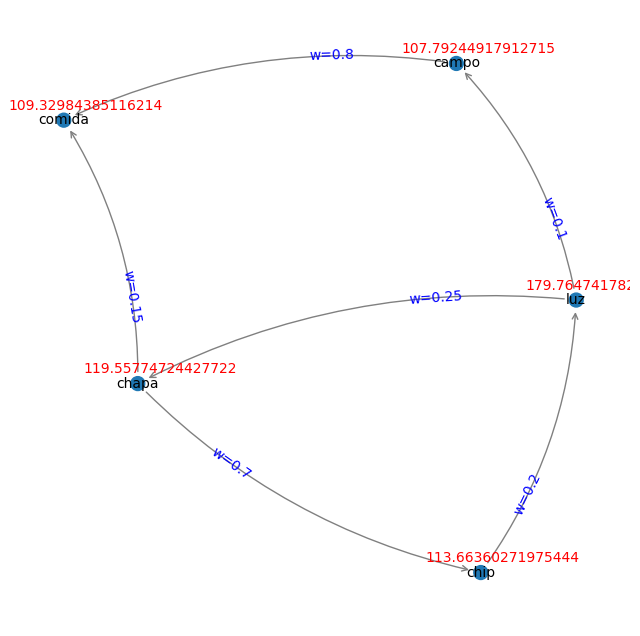

In [ ]:
exp2 = Experimento(g_test_ciclo,dinamica_1)
exp2.shock('luz',75)
exp2.step(50)
plot_grafo(exp2.grafo)

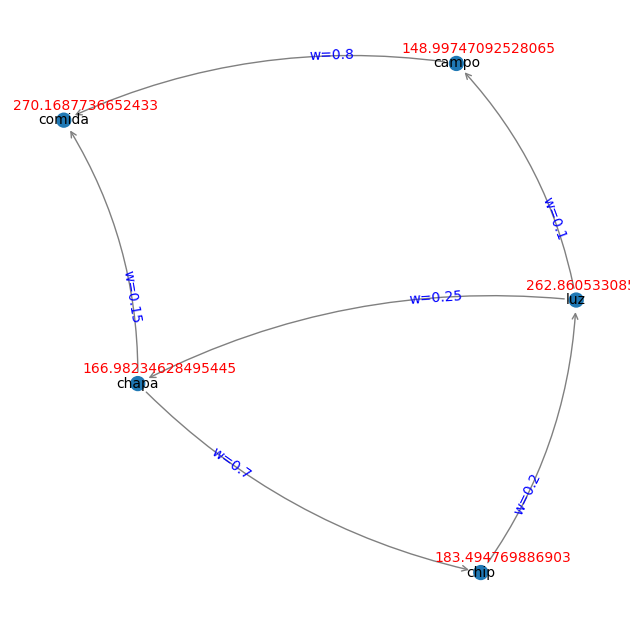

In [ ]:
exp2 = Experimento(g_test_ciclo,dinamica_3, calcular_inflacion=calcular_inflacion, alpha=0.3)
exp2.shock('luz',75)
exp2.step(50)
plot_grafo(exp2.grafo)